<a href="https://colab.research.google.com/github/fedhere/PUS2020_FBianco/blob/master/HW11/spatial_joint_of_census_tracts_and_zipcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install libspatialindex-c4v5
!pip install pysal

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-c4v5 is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [2]:
!pip install geopandas
!apt install python3-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [3]:
import pysal as ps


In [4]:
import geopandas as gpd

In [5]:
censustract = gpd.GeoDataFrame.from_file(
    "https://data.cityofnewyork.us/api/geospatial/" + 
    "fxpq-c8ku?method=export&format=GeoJSON")
censustract

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ..."
1,MN19,1906016.35002,Turtle Bay-East Midtown,5534.19981063,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ..."
2,MN19,1860938.37721,Turtle Bay-East Midtown,5692.16873705,Manhattan,3808,010000,1,I,1010000,100,"MULTIPOLYGON (((-73.96802 40.75958, -73.96848 ..."
3,MN17,1860992.70485,Midtown-Midtown South,5687.80243866,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
4,MN17,1864600.37503,Midtown-Midtown South,5693.03636655,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2160,QN61,2536195.96005,Jamaica,8201.8752654,Queens,4112,021200,4,I,4021200,212,"MULTIPOLYGON (((-73.81153 40.70227, -73.81083 ..."
2161,QN10,15530528.5775,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,35194.2249482,Queens,4114,107201,4,I,4107201,1072.01,"MULTIPOLYGON (((-73.81653 40.61495, -73.81655 ..."
2162,QN99,71788388.9114,park-cemetery-etc-Queens,182384.827557,Queens,4114,107202,4,I,4107202,1072.02,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
2163,SI11,86233396.7938,Charleston-Richmond Valley-Tottenville,54954.3509498,Staten Island,3901,022600,5,I,5022600,226,"MULTIPOLYGON (((-74.20700 40.55757, -74.20880 ..."


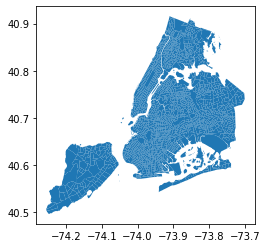

In [6]:
censustract.plot()

In [7]:
!wget https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip

--2020-11-11 17:05:48--  https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip [following]
--2020-11-11 17:05:49--  https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
Reusing existing connection to data.cityofnewyork.us:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘application%2Fzip.4’

application%2Fzip.4     [ <=>                ]   1.44M  9.58MB/s    in 0.2s    

2020-11-11 17:05:49 (9.58 MB/s) - ‘application%2Fzip.4’ saved [1514401]



In [8]:
!unzip application%2Fzip

Archive:  application%2Fzip
replace ZIP_CODE_040114.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [17]:
zipcode = gpd.GeoDataFrame.from_file("ZIP_CODE_040114.shp")
zipcode

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


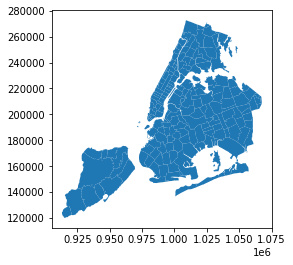

In [18]:
zipcode.plot()

In [19]:
# Convert census tract data to centroid geometry.
censustract['geometry'] = censustract.geometry.centroid


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [20]:
# Reset index of zipcodes for spatial join.
censustract.reset_index(inplace=True)
zipcode.reset_index(inplace=True)


In [21]:

# Spatial join of 2000 & 2010 census tract centroids to zipcodes.
zipcode = gpd.sjoin(left_df=censustract[["shape_leng",	"boro_name",	"ct2010", "geometry"]],
             right_df=zipcode[["ZIPCODE",	"POPULATION", "geometry"]].to_crs(censustract.crs),
             how='right', op='intersects', 
             lsuffix='00', rsuffix='zc')


In [22]:
zipcode

,index_00,shape_leng,boro_name,ct2010,ZIPCODE,POPULATION,geometry
0,409.0,6323.59663386,Queens,019000,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682..."
0,573.0,6955.46452797,Queens,018800,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682..."
0,575.0,8038.55967977,Queens,019200,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682..."
0,1168.0,7150.59389471,Queens,018402,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682..."
0,1180.0,7087.16640819,Queens,018200,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682..."
...,...,...,...,...,...,...,...
260,1862.0,7343.45091916,Brooklyn,055500,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724..."
260,1867.0,6845.7755595,Brooklyn,054900,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724..."
260,1881.0,7122.6772057,Brooklyn,055100,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724..."
261,996.0,5904.30055105,Manhattan,013200,10162,0.0,"POLYGON ((-73.95133 40.76931, -73.95165 40.769..."


In [24]:


# Join mean of spatial join results to zipcodes.
zipcode.groupby("ZIPCODE").mean()


,index_00,POPULATION
ZIPCODE,,
00083,1819.000000,25.0
10001,1703.166667,22413.0
10002,1383.928571,81305.0
10003,1693.700000,55878.0
10004,1607.333333,2187.0
...,...,...
11691,1604.000000,60267.0
11692,1359.500000,18018.0
11693,1712.333333,11052.0
